here are the steps I would take to perform neural network on a given dataset, explained in simple terms:

Data Preprocessing:

Data Cleaning: Remove or impute any missing values in the dataset.
Feature Scaling: Scale the features to a similar range to ensure that they contribute equally to the model's performance.
Feature Encoding: Convert categorical variables into numerical representations if necessary.
Train-Test Split: Split the dataset into training and testing sets to evaluate the model's performance.
Building the Neural Network Architecture:

Define the Architecture: Decide on the number of layers, the number of neurons in each layer, and the activation functions to be used.
Initialize Weights and Biases: Initialize the weights and biases of the neural network randomly or using predefined methods like Xavier initialization.
Choose Loss Function: Select a suitable loss function based on the problem type (e.g., mean squared error for regression, cross-entropy loss for classification).
Choose Optimization Algorithm: Select an optimization algorithm (e.g., stochastic gradient descent, Adam) to minimize the loss function during training.
Training the Neural Network:

Forward Propagation: Feed the training data forward through the network to calculate the predicted outputs.
Compute Loss: Calculate the loss between the predicted outputs and the actual targets using the chosen loss function.
Backpropagation: Calculate the gradients of the loss function with respect to the network parameters (weights and biases) using backpropagation.
Update Parameters: Use the gradients to update the weights and biases of the network using the chosen optimization algorithm.
Evaluating the Model:

Predictions: Use the trained model to make predictions on the testing dataset.
Evaluate Performance: Calculate evaluation metrics such as accuracy, precision, recall, or mean squared error to assess the model's performance on the testing dataset.
Tuning Hyperparameters:

Grid Search or Random Search: Tune hyperparameters such as learning rate, number of neurons, and number of layers using techniques like grid search or random search to improve the model's performance.
Cross-Validation: Use techniques like k-fold cross-validation to assess the model's performance across different subsets of the data.
Deployment:

Once satisfied with the model's performance, deploy it to make predictions on new, unseen data.
By following these steps, we can build and train a neural network model to make predictions on a given dataset.

In [86]:
## First, let's start by importing the required libraries and loading the dataset into a Pandas DataFrame

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import GradientBoostingClassifier
from keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from keras.optimizers import RMSprop
from keras.optimizers import SGD
from tensorflow.keras.layers import LeakyReLU
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import h5py



In [62]:

# Load the dataset into a Pandas DataFrame
data = pd.read_csv('heart_failure.csv')

In [8]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [63]:
# Checking for any missing values across the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [64]:
## Data Cleaning
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [65]:
# Separate features and target
X = data.drop('DEATH_EVENT', axis=1)
y = data['DEATH_EVENT']

# Encode categorical variables
categorical_cols = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
le = LabelEncoder()
for col in categorical_cols:
    X[col] = le.fit_transform(X[col])

# Scale numerical features
scaler = StandardScaler()
numerical_cols = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [116]:
model = Sequential()
model.add(Dense(units=32, kernel_initializer='uniform', activation='relu', input_dim=X_train.shape[1])) #initial layer
model.add(Dense(units=64, kernel_initializer='uniform', activation='relu')) ## hidden layer 1
#model.add(Dense(units=32, kernel_initializer='uniform', activation='relu')) ## hidden layer 2
#model.add(Dense(units=16, kernel_initializer='uniform', activation='relu')) ## hidden layer 3
#model.add(Dense(units=8, kernel_initializer='uniform', activation='relu')) ## hidden layer 4
#model.add(Dense(units=8, kernel_initializer='uniform', activation='relu')) ## hidden layer 5
model.add(Dropout(0.2))
model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))  ## output layer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



# Train the model
#early_stop = EarlyStopping(monitor='val_loss', patience=10)
#model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stop],validation_split=0.20)


# Train the model
history = model.fit(X_train, y_train, batch_size=64, epochs=20, validation_split=0.2)

Epoch 1/20
3/3 [==============================] - 2s 241ms/step - loss: 0.6927 - accuracy: 0.6649 - val_loss: 0.6913 - val_accuracy: 0.7500
Epoch 2/20
3/3 [==============================] - 0s 36ms/step - loss: 0.6907 - accuracy: 0.6911 - val_loss: 0.6891 - val_accuracy: 0.7500
Epoch 3/20
3/3 [==============================] - 0s 29ms/step - loss: 0.6885 - accuracy: 0.6911 - val_loss: 0.6862 - val_accuracy: 0.7500
Epoch 4/20
3/3 [==============================] - 0s 35ms/step - loss: 0.6857 - accuracy: 0.6911 - val_loss: 0.6822 - val_accuracy: 0.7500
Epoch 5/20
3/3 [==============================] - 0s 32ms/step - loss: 0.6813 - accuracy: 0.6911 - val_loss: 0.6770 - val_accuracy: 0.7500
Epoch 6/20
3/3 [==============================] - 0s 34ms/step - loss: 0.6765 - accuracy: 0.6911 - val_loss: 0.6701 - val_accuracy: 0.7500
Epoch 7/20
3/3 [==============================] - 0s 36ms/step - loss: 0.6681 - accuracy: 0.6911 - val_loss: 0.6612 - val_accuracy: 0.7500
Epoch 8/20
3/3 [==========

In [76]:
## save the network
#model.save('version_3.h5')

c:\Users\kater\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [90]:
## load the file
#version_2_model = tf.keras.models.load_model('version_2.h5')

In [117]:
## Evaluate the ANN Model

## After training, we'll evaluate the performance of the ANN model on the test data.

# Evaluate the model
scores = model.evaluate(X_test, y_test)
print('Accuracy:', scores[1])

2/2 [==============================] - 0s 15ms/step - loss: 0.6337 - accuracy: 0.6833
Accuracy: 0.6833333373069763


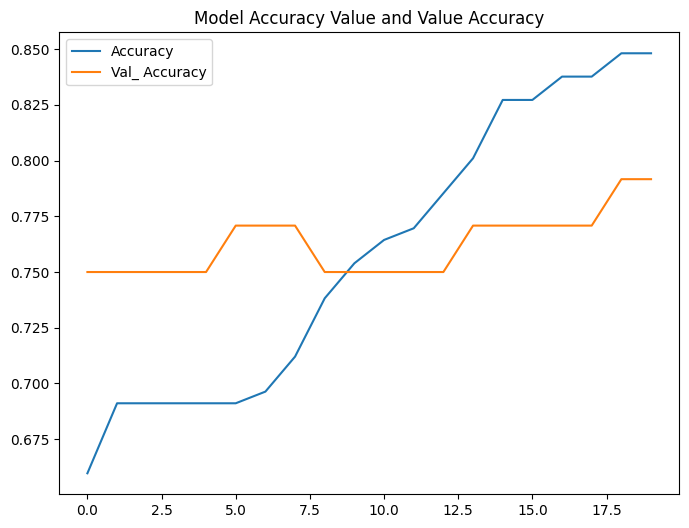

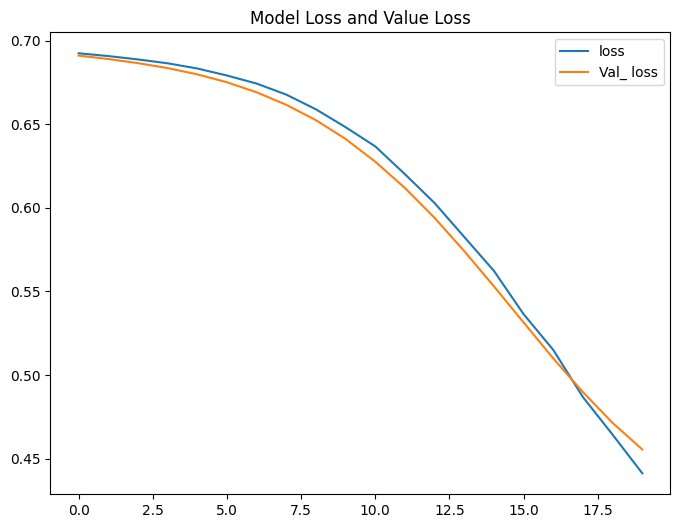

In [111]:
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label = 'Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Val_ Accuracy')
plt.title('Model Accuracy Value and Value Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'Val_ loss')
plt.title('Model Loss and Value Loss')
plt.legend()
plt.show()